Epoch 1/50, Train Loss: 0.7036, Test Loss: 0.6692
Epoch 6/50, Train Loss: 0.4902, Test Loss: 0.4975
Epoch 11/50, Train Loss: 0.2934, Test Loss: 0.4138
Epoch 16/50, Train Loss: 0.2680, Test Loss: 0.4779
Epoch 21/50, Train Loss: 0.2160, Test Loss: 0.4330
Epoch 26/50, Train Loss: 0.1758, Test Loss: 0.4124
Epoch 31/50, Train Loss: 0.1451, Test Loss: 0.4546
Epoch 36/50, Train Loss: 0.1110, Test Loss: 0.5067
Epoch 41/50, Train Loss: 0.0838, Test Loss: 0.5999
Epoch 46/50, Train Loss: 0.0601, Test Loss: 0.7249


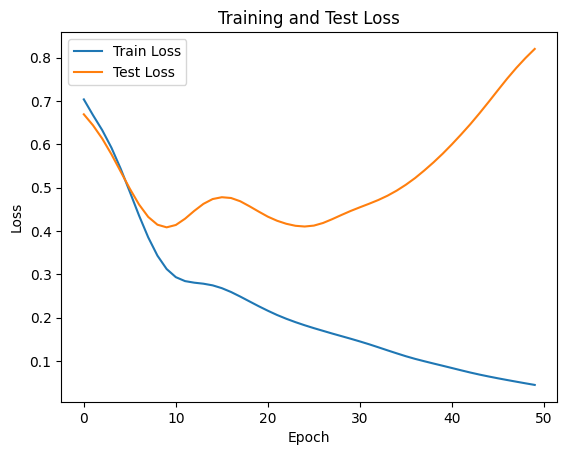

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

# Define the neural network architecture
class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model, loss function, and optimizer
model = ANN(X.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 50
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train_tensor)

    # Compute loss
    loss = criterion(y_pred.squeeze(), y_train_tensor)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Record training loss
    train_losses.append(loss.item())

    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        test_loss = criterion(y_test_pred.squeeze(), y_test_tensor)
        test_losses.append(test_loss.item())

    if epoch % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Plotting
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

